###### Assessment

###### I am going to provide two .csv files , you are supposed to work on them and have to provide solutions to the following problems

###### import necessary libraries

In [1]:
import os,glob
import pandas as pd
import matplotlib.pyplot as plt

###### merge those two csv files (after getting as dataframes, get them as a single dataframe)

In [2]:
path='C:/Users/hanna/Assignments/College'
all_files=glob.glob(os.path.join(path,"college_*.csv"))

In [4]:
df_from_each_file=(pd.read_csv(f,sep=',')for f in all_files)
df_merge=pd.concat(df_from_each_file,ignore_index=True)
df_merge.to_csv("merged.csv")

In [5]:
file=pd.read_csv('merged.csv')
file.head()

,Unnamed: 0,Name,python,mysql,Previous Geekions,CodeKata Score,Department,Rising,python_en,computational_thinking
0,0,A.Dharani,82.0,20.0,24500,24500,Computer Science and Engineering,0,NaN,NaN
1,1,V.JEEVITHA,82.0,20.0,21740,21740,Computer Science and Engineering,0,NaN,NaN
2,2,HEMAVATHI.R,100.0,100.0,19680,19680,Computer Science and Engineering,0,NaN,NaN
3,3,Mugunthan S,100.0,47.0,10610,10610,Computer Science and Engineering,0,NaN,NaN
4,4,Sathammai.S,100.0,8.0,8980,8980,Computer Science and Engineering,0,NaN,NaN


###### Take each csv file , split that csv file into multiple categories (example csv files are added in the repo) 


###### consider if the codekata score exceeds 15000 points(present week) then make a csv on those observations as Exceeded expectations.csv


###### if  10000<codekata score<15000   (Reached_expectations.csv)



###### if  7000<codekata score<10000   (Needs_Improvement.csv)


###### if  codekate score < 7000        (Unsatisfactory.csv)

In [6]:
exceed=file['CodeKata Score'].values > 15000
df_exceed=file[exceed]
df_exceed.head()

,Unnamed: 0,Name,python,mysql,Previous Geekions,CodeKata Score,Department,Rising,python_en,computational_thinking
0,0,A.Dharani,82.0,20.0,24500,24500,Computer Science and Engineering,0,NaN,NaN
1,1,V.JEEVITHA,82.0,20.0,21740,21740,Computer Science and Engineering,0,NaN,NaN
2,2,HEMAVATHI.R,100.0,100.0,19680,19680,Computer Science and Engineering,0,NaN,NaN
84,84,ASHOK KUMAR K,100.0,31.0,19400,19400,Electronics and Electrical Engineering,0,0.0,9.0


In [7]:
df_exceed.to_csv('Exceeded expectations.csv')

In [9]:
reached=(file['CodeKata Score'].values >10000)&(file['CodeKata Score'].values < 15000)
df_reached=file[reached]
df_reached.head()

,Unnamed: 0,Name,python,mysql,Previous Geekions,CodeKata Score,Department,Rising,python_en,computational_thinking
3,3,Mugunthan S,100.0,47.0,10610,10610,Computer Science and Engineering,0,NaN,NaN
85,85,Chandru,0.0,0.0,14150,14490,Computer Science and Engineering,340,20.0,0.0
86,86,Ganesh Ramkumar R,-1.0,24.0,8790,10790,Computer Science and Engineering,2000,55.0,6.0
87,87,Bodipudi Harini,-1.0,35.0,10040,10040,Electronics and Communication Engineering,0,0.0,-1.0


In [10]:
df_reached.to_csv('Reached_expectations.csv')

In [11]:
need=(file['CodeKata Score'].values >7000)&(file['CodeKata Score'].values<10000)
df_need=file[need]
df_need.head()

,Unnamed: 0,Name,python,mysql,Previous Geekions,CodeKata Score,Department,Rising,python_en,computational_thinking
4,4,Sathammai.S,100.0,8.0,8980,8980,Computer Science and Engineering,0,NaN,NaN
5,5,NIVEESHWAR S,100.0,0.0,8200,8200,Computer Science and Engineering,0,NaN,NaN
6,6,KALAIARASAN K,85.0,47.0,7750,7880,Electronics and Communication Engineering,130,NaN,NaN
7,7,MOHAMED ZUBAIR AHMED,82.0,4.0,7020,7020,Computer Science and Engineering,0,NaN,NaN
88,88,VIINU V P,-1.0,24.0,9150,9150,Electronics and Electrical Engineering,0,100.0,-1.0


In [12]:
df_need.to_csv('Needs_Improvement.csv')

In [14]:
unsatisfactory=file['CodeKata Score'].values < 7000
df_unsatisfactory=file[unsatisfactory]
df_unsatisfactory.head()

,Unnamed: 0,Name,python,mysql,Previous Geekions,CodeKata Score,Department,Rising,python_en,computational_thinking
8,8,J.SUGANTHI,27.0,50.00,5860,5860,Electronics and Communication Engineering,0,NaN,NaN
9,9,thamizhpaana,29.0,0.00,5500,5500,Computer Science and Engineering,0,NaN,NaN
10,10,Iyappan Samiraj,50.0,24.00,5400,5400,Electronics and Communication Engineering,0,NaN,NaN
11,11,Ponniyamma.R,100.0,11.25,5380,5380,Computer Science and Engineering,0,NaN,NaN
12,12,SABAPATHI,100.0,0.00,5280,5280,Computer Science and Engineering,0,NaN,NaN


In [15]:
df_unsatisfactory.to_csv('Unsatisfactory.csv')

###### Average of previous week geekions vs this week geekions (i.e Previous Geekions vs CodeKata Score)

In [16]:
df_mean=file[['Previous Geekions','CodeKata Score']].mean()
print(df_mean)

Previous Geekions    3842.352941
CodeKata Score       4051.764706
dtype: float64


###### No of students participated 

In [17]:
index=file.index
no_students=len(index)
print(no_students)

119


###### #Average completion of python course or my_sql or python english or computational thinking

In [18]:
df_avg1=file[['python','mysql','python_en','computational_thinking']].mean()
print(df_avg1)

python                    54.352941
mysql                     23.500000
python_en                 29.657143
computational_thinking     2.200000
dtype: float64


###### rising star of the week (top 3 candidate who performed well in that particular week)

In [19]:
rising_star=file.nlargest(3,['Rising'])
rising_star

,Unnamed: 0,Name,python,mysql,Previous Geekions,CodeKata Score,Department,Rising,python_en,computational_thinking
92,92,shifak N,58.0,0.0,5180,8320,Electronics and Electrical Engineering,3140,0.0,0.0
86,86,Ganesh Ramkumar R,-1.0,24.0,8790,10790,Computer Science and Engineering,2000,55.0,6.0
102,102,Narasimhan Y L,-1.0,0.0,4800,6800,Computer Science and Engineering,2000,-1.0,0.0


###### Shining stars of the week (top 3 candidates who has highest geekions)

In [20]:
shining_star=file.nlargest(3,['CodeKata Score'])
shining_star

,Unnamed: 0,Name,python,mysql,Previous Geekions,CodeKata Score,Department,Rising,python_en,computational_thinking
0,0,A.Dharani,82.0,20.0,24500,24500,Computer Science and Engineering,0,NaN,NaN
1,1,V.JEEVITHA,82.0,20.0,21740,21740,Computer Science and Engineering,0,NaN,NaN
2,2,HEMAVATHI.R,100.0,100.0,19680,19680,Computer Science and Engineering,0,NaN,NaN


###### Department wise codekata performence (pie chart)

array([<AxesSubplot:ylabel='CodeKata Score'>], dtype=object)

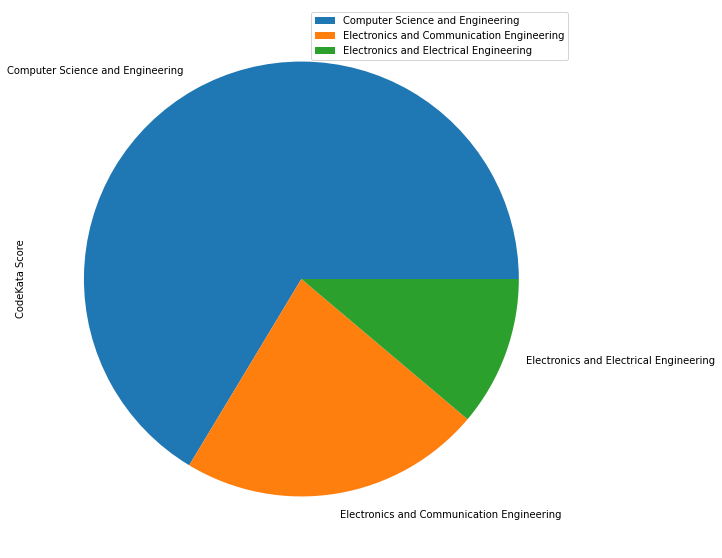

In [21]:
file.groupby(['Department']).sum().plot(kind='pie',y='CodeKata Score',subplots=True,figsize=(10,10))

###### Department wise toppers (horizantal bar graph or any visual representations of your choice)

In [22]:
df1=file.groupby(['Department'])

In [23]:
df2=df1.apply(lambda x:x.sort_values(['CodeKata Score'],ascending=False)).reset_index(drop=True)

In [24]:
df3=df2.groupby('Department').head(1)
df3

,Unnamed: 0,Name,python,mysql,Previous Geekions,CodeKata Score,Department,Rising,python_en,computational_thinking
0,0,A.Dharani,82.0,20.0,24500,24500,Computer Science and Engineering,0,NaN,NaN
63,87,Bodipudi Harini,-1.0,35.0,10040,10040,Electronics and Communication Engineering,0,0.0,-1.0
102,84,ASHOK KUMAR K,100.0,31.0,19400,19400,Electronics and Electrical Engineering,0,0.0,9.0


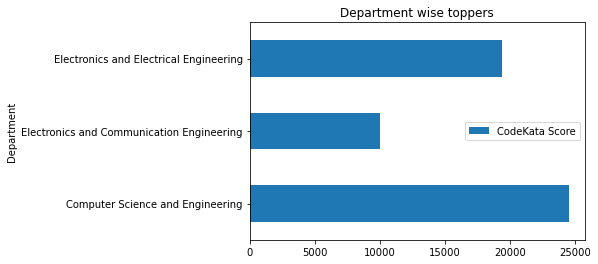

In [25]:
df3.plot(x='Department',y='CodeKata Score',kind='barh',title='Department wise toppers')
plt.show()